# <img src = 'https://www.lsa-conso.fr/mediatheque/3/0/7/000143703_87.jpg' style= 'width:425px;height:300px'/>
<h2>Ala Bouslama </h2>  
    
        
        

# Objective of the Project : 

<b> The objective is to perform a products sales analysis, analyze sales history data and identify key points
that made the business profitable or not.

# <b> Data Overview 

In [172]:
# Importing pandas, matplotlib and seaborn for further use.
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

In [173]:
#Loading and reading the file
df = pd.read_csv("Sales.csv")

In [174]:
#Displaying first 5 rows of the dataframe
df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [175]:
#Genetal information
print('Our dataset contains{} Colonnes,and {} lignes '.format(df.columns.value_counts().count(),df.index.value_counts().count()))

Our dataset contains22 Colonnes,and 9994 lignes 


In [176]:
# Description and Meaning of the main features : 
print ("\nFeatures : \n" ,df.columns.tolist())


Features : 
 ['Order ID', 'Order Date', 'Order Year', 'Order Quarter', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [177]:
# Check the number of unique values in each Column
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 Order ID         5009
Order Date       1236
Order Year          4
Order Quarter       4
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       630
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64


 <b>Data dictionary<br> 
 <br>
 <b> Order ID : Unique identifier per order per product .                                        Type : String <br>
    Order Date: The date when the customer ordered a product.                                    Type : Date <br>
    Order year :The year when the customer ordered a product.                                    Type : Number <br>
    Ship date : The date on which the product is sent out to the customer.                       Type : Date <br>
    Ship Mode :The mode of the order (First Class,Same Day,Second Class,Standard Class).         Type : String <br>
    Customer ID: Unique customer identifier .                                                    Type : String <br>
    Segment : The segment of the product ordered (Customer , Corporate , Home Office ).          Type : String<br>
    Country: The name of the country in which the Client lives.                                  Type : String <br>
    Product ID : Identifier of each product ordered.                                             Type : String <br> 
    Category : The name of the each product category ( Furniture, Office Supplies, Technology ). Type : String <br>
    Sales : Amount of sales per transaction .                                                    Type : Number<br>
    Quantity : The quantity of each product per transaction.                                     Type : Number<br>
    Discount : Percentage of discount offered per product.                                       Type : Number <br>
    Profit : Profit maked by C-Discount per transaction.                                         Type : Number<br>
    

# <b> Data Cleaning 

In [178]:
# check the Total missing values in our data
print ("\Missing values :  ", df.isnull().sum().values.sum())


\Missing values :   11


 <b> We only have 11 missing values in all our data. 

In [179]:
df.isnull().sum()
total_missing_non_standard=df.isnull().sum().sort_values(ascending=False)
percent_non_standard = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_values_non_standard = pd.concat([total_missing_non_standard, percent_non_standard], axis=1, keys=['Total_missing', 'Percent'])
missing_values_non_standard.head(8)


,Total_missing,Percent
Postal Code,11,0.001101
Profit,0,0.000000
Country,0,0.000000
Order Date,0,0.000000
Order Year,0,0.000000
Order Quarter,0,0.000000
Ship Date,0,0.000000
Ship Mode,0,0.000000


<b> The  11 missing values are within The Postal code column

In [180]:
# Let's try to fill in the missing values
j= df[df['Postal Code'].isnull()]
j[['Postal Code','State', 'Region' ,'City']]

,Postal Code,State,Region,City
2234,NaN,Vermont,East,Burlington
5274,NaN,Vermont,East,Burlington
8798,NaN,Vermont,East,Burlington
9146,NaN,Vermont,East,Burlington
9147,NaN,Vermont,East,Burlington
9148,NaN,Vermont,East,Burlington
9386,NaN,Vermont,East,Burlington
9387,NaN,Vermont,East,Burlington
9388,NaN,Vermont,East,Burlington
9389,NaN,Vermont,East,Burlington


<b> The 11 postal codes that are missing values are in the same location ( State : Vermont , Region : East , City : Burlington ), So we will fill in these rows by the postal code that corresponds to this specific location which is 05401


In [181]:
df['Postal Code'].fillna(value='05401', inplace = True)

In [182]:
print ("\Missing values :  ", df.isnull().sum().values.sum())


\Missing values :   0


#  Data enrichment ( Adding 3 columns ) 

In [183]:
# Add a new column named profitability_ratio

df['profbitability_ratio']= df.Profit / df.Sales

In [184]:
#add PRICE column 

df['Price']= df['Sales'] / df['Quantity']


In [185]:

#Add Cost Column 
df['Cost']= df['Sales'] - df['Profit']
df.head()

,Order ID,Order Date,Order Year,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profbitability_ratio,Price,Cost
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,130.9800,220.0464
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,243.9800,512.3580
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,7.3100,7.7486
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,191.5155,1340.6085
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,11.1840,19.8516


# Data Analysis

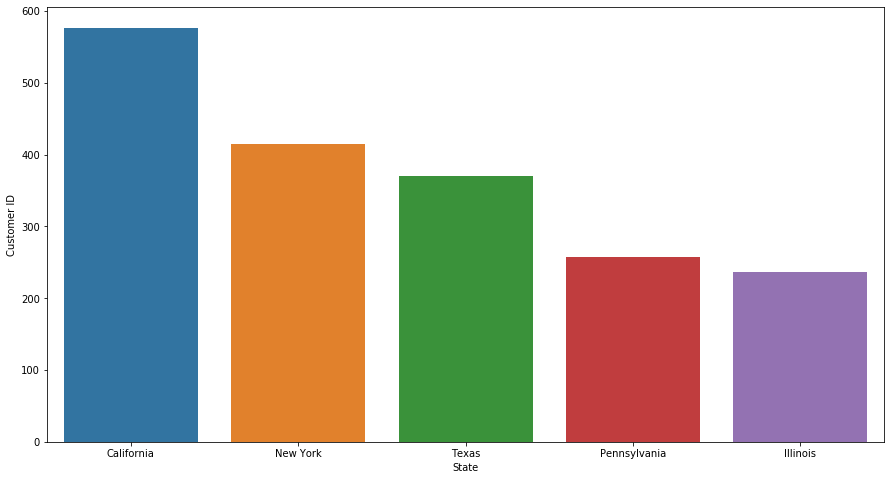

In [198]:
#Let's see now the highest states in terms of number of customer
Number_of_customers=df.groupby ('State')['Customer ID'].nunique().sort_values(ascending=False).reset_index().head(5) 
plt.figure(figsize=(15,8))
sb.barplot(data=Number_of_customers, x='State', y='Customer ID' , orient = True)

<b> California and New York have the highest number of Clients 

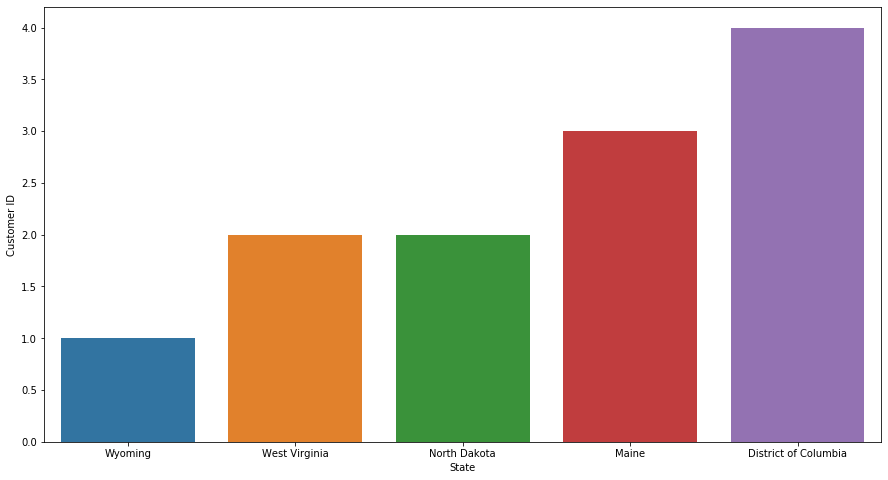

In [199]:
# Let's see now the lowest state in terms of number of customer
Number_of_customers_per_state=df.groupby ('State')['Customer ID'].nunique().sort_values(ascending=True).reset_index().head(5) 
plt.figure(figsize=(15,8))
sb.barplot(data=Number_of_customers_per_state, x='State', y='Customer ID' , orient = True)

 C-discount should target more these states as only 1 customer in Wyoming and 2 customers in West Virginia and North Dakato State.

In [200]:
#Aggregate function to show the sales mean in each of the 3 segments.
mean_segment = df.groupby('Segment').Sales.mean().reset_index()
mean_segment

,Segment,Sales
0,Consumer,223.733644
1,Corporate,233.823300
2,Home Office,240.972041


In [201]:
#Changing the column name from sales to Average sales.
mean_segment.rename(columns={'Sales':'Average sales'}, inplace=True )
mean_segment

,Segment,Average sales
0,Consumer,223.733644
1,Corporate,233.823300
2,Home Office,240.972041


<b>The company is maintaining almost the same average sales over the three segments which is one of its strengths.

In [202]:
#Creating a new serie using the groupby function that displays the quantity sold to each sub-category.
Quantity_by_category = df.groupby(['Category','Sub-Category']).Quantity.sum().reset_index()
Quantity_by_category

,Category,Sub-Category,Quantity
0,Furniture,Bookcases,868
1,Furniture,Chairs,2356
2,Furniture,Furnishings,3563
3,Furniture,Tables,1241
4,Office Supplies,Appliances,1729
5,Office Supplies,Art,3000
6,Office Supplies,Binders,5974
7,Office Supplies,Envelopes,906
8,Office Supplies,Fasteners,914
9,Office Supplies,Labels,1400


In [203]:
#Changing the name of the column from Quantity to Quantity by Sub_Category. 
Quantity_by_category.rename(columns={'Quantity':'Quantity by Sub-Category'}, inplace=True)
Quantity_by_category

,Category,Sub-Category,Quantity by Sub-Category
0,Furniture,Bookcases,868
1,Furniture,Chairs,2356
2,Furniture,Furnishings,3563
3,Furniture,Tables,1241
4,Office Supplies,Appliances,1729
5,Office Supplies,Art,3000
6,Office Supplies,Binders,5974
7,Office Supplies,Envelopes,906
8,Office Supplies,Fasteners,914
9,Office Supplies,Labels,1400


<b> For the furniture , we  have furnishings sub category has the higher quantity sold and the smallest one is Bookcases<br>
For the Office Supplies , we  have Binders sub category has the higher quantity sold and the smallest one is Fsteners<br>
For the Technology , we  have Phones sub category has the higher quantity sold and the smallest one is Copiers ( The company should focus more on selling the copiers  as it has the lowest quantity sold) <br>
The higher quantity sold for all sub categories is Binders and the smallest one is Copiers

In [204]:
#Renaming the column from Order Year to orderyear.
df.rename(columns={'Order Year':'orderyear'},inplace=True)
df.head()

,Order ID,Order Date,orderyear,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profbitability_ratio,Price,Cost
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,130.9800,220.0464
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,243.9800,512.3580
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,7.3100,7.7486
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,191.5155,1340.6085
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,11.1840,19.8516


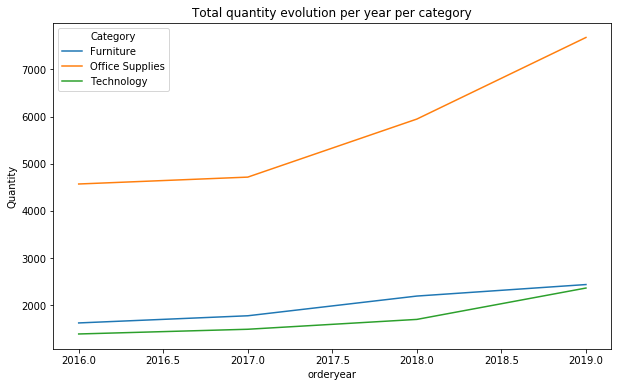

In [205]:
#Ploting the evolution of the quantity sold per category.
by_year_sub_category_quantity = df.groupby(['orderyear','Category']).Quantity.sum().reset_index()

plt.figure( figsize = (10,6 ))
chart=sb.lineplot(data=by_year_sub_category_quantity, x='orderyear', hue='Category', y='Quantity', ci=None)
chart.set_title('Total quantity evolution per year per category')
chart.set_xlabel('orderyear')
chart.set_ylabel('Quantity')
plt.show()

<b>The quantity of Office supplies is increasing during the last 3 years ( it has been almost doubled from 2016 to 2019) . However , the quantity sold of Furniture and Technology is almost stable with a small increase .

In [206]:
#Calculating the sum of the profit and sum of the sales per segment.
sum_profit_perpoduct = df.groupby('Segment').agg(sum_sales=('Sales','sum'),sum_profit=('Profit','sum')).reset_index()
sum_profit_perpoduct

,Segment,sum_sales,sum_profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


 <b> The highest  profit and sales  are for Consumer segment and the lowest profit   is for home office.

In [207]:
#Calculating sum profit,sum sales and profitability ratio per segment.
sum_profit_perpoduct['Profitability ratio']= sum_profit_perpoduct['sum_profit'] / sum_profit_perpoduct['sum_sales']
sum_profit_perpoduct

,Segment,sum_sales,sum_profit,Profitability ratio
0,Consumer,1.161401e+06,134119.2092,0.115481
1,Corporate,7.061464e+05,91979.1340,0.130255
2,Home Office,4.296531e+05,60298.6785,0.140343


<b> The profitability_ratio for home office is the highest one and the lowest one is for the consumer segment.

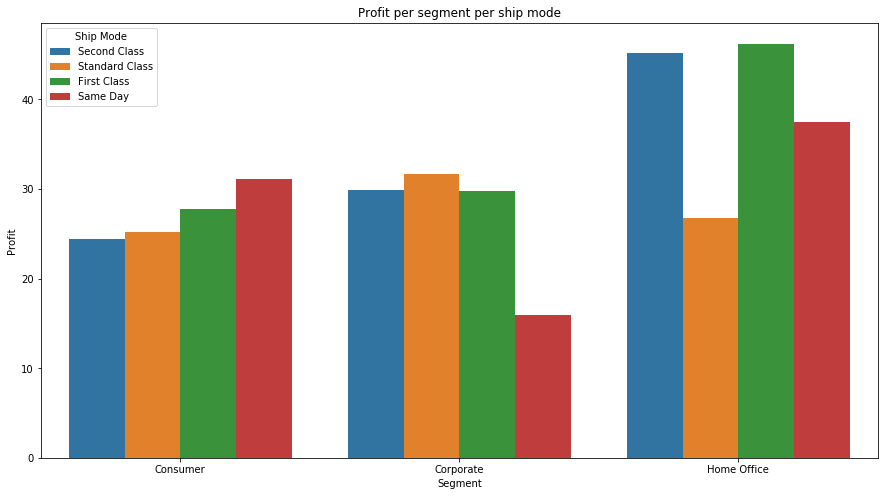

In [208]:
# Let's see the relation between the ship mode and the profit per segment
plt.figure( figsize = (15, 8) )
chart=sb.barplot(data=df, x='Segment', hue='Ship Mode', y='Profit', ci=None)
chart.set_title('Profit per segment per ship mode')
chart.set_xlabel('Segment')
chart.set_ylabel('Profit')
plt.show()

<b> We notice that the highest profit is comming from the first class ship mode for the home office segment. However the lowest 
profit is comming from Same day ship mode within the corporate Segment.

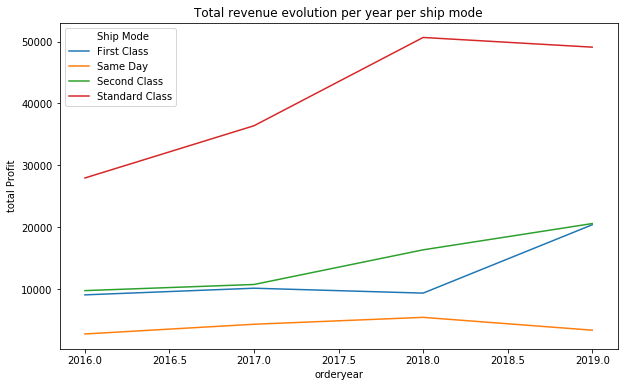

In [209]:
# Let's see the perfermance evolution of each ship mode in the last 3 years
plt.figure( figsize = (10,6 ))
chart=sb.lineplot(data=by_year_ship_mode_revenue, x='orderyear', hue='Ship Mode', y='Profit', ci=None)
chart.set_title('Total revenue evolution per year per ship mode')
chart.set_xlabel('orderyear')
chart.set_ylabel('total Profit')
plt.show()

<b> From this chart we can see that the Standard class is the best for the company in terms of profit and the worst one is  the same day ship mode. 
However , for the Standard Class , there is a decrease in the total profit since 2018 ,  So the company should  review the history of transactions  of the Standard class in the last 2 years as it represents the best ship mode for C-discounts in terms of Profit.

<b>Now we will compare the discount evolution to the profit,sales and cost revolution per year per region 

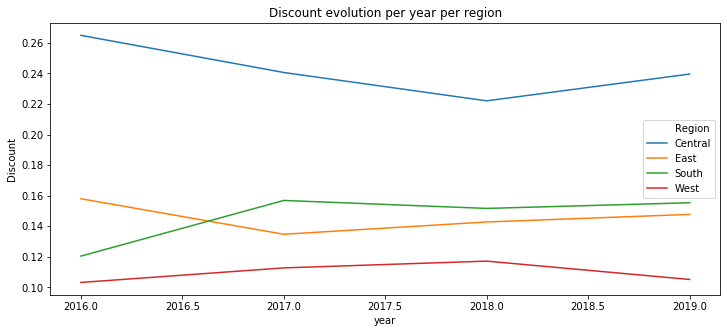

In [210]:
# ploting a graph showing discount evolution per year per region.
Discount_per_region_peryear = df.groupby(['orderyear','Region']).Discount.mean().reset_index()

plt.figure( figsize = (12,5 ))
chart=sb.lineplot(data=Discount_per_region_peryear, x='orderyear', hue='Region', y='Discount', ci=None)
chart.set_title('Discount evolution per year per region')
chart.set_xlabel('year')
chart.set_ylabel('Discount')
plt.show()

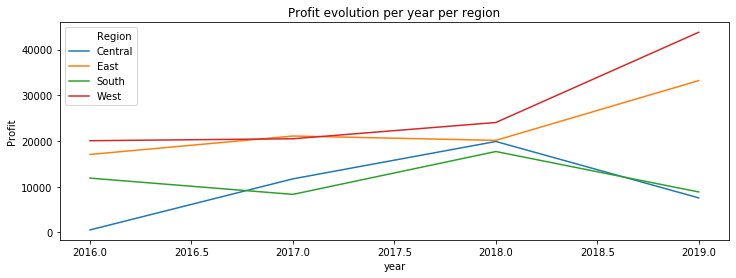

In [211]:
# ploting a graph profit evolution  per year per region.
Profit_per_region_peryear = df.groupby(['orderyear','Region']).Profit.sum().reset_index()
plt.figure( figsize = (12,4 ))
chart=sb.lineplot(data=Profit_per_region_peryear, x='orderyear', hue='Region', y='Profit', ci=None)
chart.set_title('Profit evolution per year per region')
chart.set_xlabel('year')
chart.set_ylabel('Profit')
plt.show()

<b>For both the West and the East the profit is increasing while the discount is almost stable in both of them between 2018 and 2019. For the Central region, the discount is the highest while the profit is decreasing starting from 2018 sharply. The discount is not impacting the central region profit. 

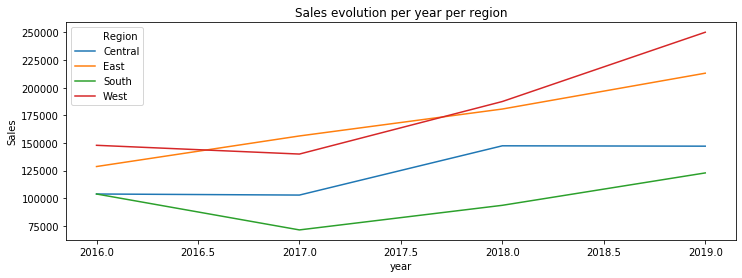

In [212]:
# ploting a graph of sales evolution  per year per region.
Sales_per_region_peryear = df.groupby(['orderyear','Region']).Sales.sum().reset_index()
plt.figure( figsize = (12,4 ))
chart=sb.lineplot(data=Sales_per_region_peryear, x='orderyear', hue='Region', y='Sales', ci=None)
chart.set_title('Sales evolution per year per region')
chart.set_xlabel('year')
chart.set_ylabel('Sales')
plt.show()

<b> The sales in the west are increasing while the discount is not impacting this sales temporarily because it is stable over the last years. The sales for  the central increased due to discount in a ertain moment but now it became stagnant. 

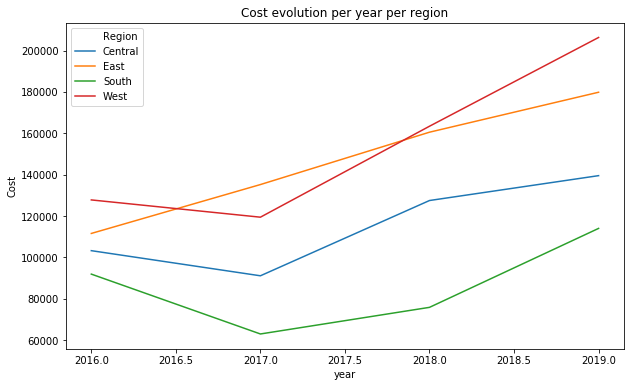

In [213]:
Cost_peryear_perquarter = df.groupby(['orderyear','Region']).Cost.sum().reset_index()

plt.figure( figsize = (10,6 ))
chart=sb.lineplot(data=Cost_peryear_perquarter, x='orderyear', hue='Region', y='Cost', ci=None)
chart.set_title('Cost evolution per year per region')
chart.set_xlabel('year')
chart.set_ylabel('Cost')
plt.show()

<b>In all regions , the cost is increasing since 2017 especially in the West Region ( it reached 200 000$ in 2019 )<br>
    The south region has the lowest cost (  half of the West cost in 2019 ) 

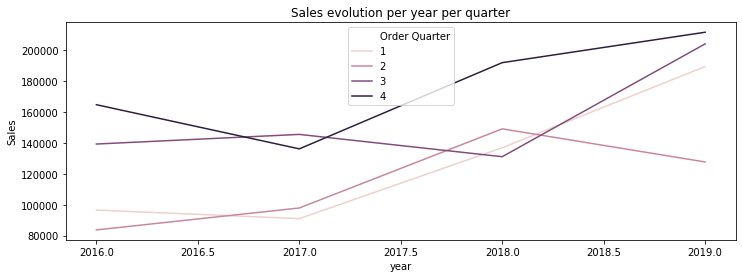

In [214]:
#Creating a graph that shows the sales evolution per year per quarter
Sales_peryear_perquarter = df.groupby(['orderyear','Order Quarter']).Sales.sum().reset_index()

plt.figure( figsize = (12,4 ))
chart=sb.lineplot(data=Sales_peryear_perquarter, x='orderyear', hue='Order Quarter', y='Sales', ci=None)
chart.set_title('Sales evolution per year per quarter')
chart.set_xlabel('year')
chart.set_ylabel('Sales')
plt.show()

<b> During the 4 last years , The fourth Quarter is  the best quarter in terms of sales as it reaches more than 200 000M$ in 2019. 
We notice that there is an increasing trend that all the quarters are folowing except for the 3rd quarter which is decreasing since 2018 . Thus, the company should focus more on the this quarter through for example improving more its marketing activities during this quarter. 

In [215]:
#CREATING A NEW DATAFRAME for the year 2019  (extract only 2019 transactions)
df1 = df[df.orderyear == 2019 ]
df1.shape

(3312, 25)

 The new 2019 dataset contains 3312 rows. 

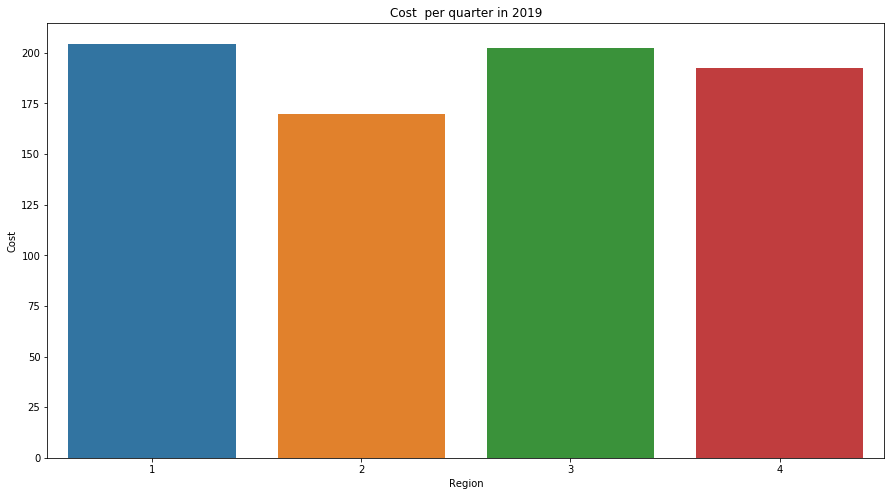

In [216]:
#Creating a bar chart to analyze the cost per region per quarter in 2019
plt.figure( figsize = (15, 8) )
chart=sb.barplot(data=df1, x='Order Quarter', y='Cost', ci=None)
chart.set_title('Cost  per quarter in 2019')
chart.set_xlabel('Region')
chart.set_ylabel('Cost')

plt.show()

The cost in the  third quarter represents almost the highest  cost for C-discount.

In [217]:
# Creating a table containing the cost per qurter per region using groupby
Cost_perquarter = df1.groupby(['Region','Order Quarter']).Cost.sum().reset_index()
Cost_perquarter

,Region,Order Quarter,Cost
0,Central,1,44052.8496
1,Central,2,22623.9871
2,Central,3,31110.1000
3,Central,4,41760.3473
4,East,1,25824.6811
5,East,2,29494.4508
6,East,3,62231.5022
7,East,4,62301.7085
8,South,1,24604.6143
9,South,2,30689.4573


In [218]:
# Making the table more readeable 
Cost_perquarter_pivot = Cost_perquarter.pivot ( columns='Order Quarter', index='Region',values='Cost')
Cost_perquarter_pivot

Order Quarter,1,2,3,4
Region,,,,
Central,44052.8496,22623.9871,31110.1000,41760.3473
East,25824.6811,29494.4508,62231.5022,62301.7085
South,24604.6143,30689.4573,25586.6877,33176.1903
West,61786.4916,35815.1484,59307.0010,49410.7684


In [219]:
# Adding a total cost per quarter in the table
Cost_perquarter_pivot.loc["Total Cost per quarter",:] = Cost_perquarter_pivot.sum(axis=0)
Cost_perquarter_pivot

Order Quarter,1,2,3,4
Region,,,,
Central,44052.8496,22623.9871,31110.1000,41760.3473
East,25824.6811,29494.4508,62231.5022,62301.7085
South,24604.6143,30689.4573,25586.6877,33176.1903
West,61786.4916,35815.1484,59307.0010,49410.7684
Total Cost per quarter,156268.6366,118623.0436,178235.2909,186649.0145


In [220]:
Cost_perquarter_pivot.loc[:,'Total Cost per Region']=Cost_perquarter_pivot.sum(axis=1)
Cost_perquarter_pivot

Order Quarter,1,2,3,4,Total Cost per Region
Region,,,,,
Central,44052.8496,22623.9871,31110.1000,41760.3473,139547.2840
East,25824.6811,29494.4508,62231.5022,62301.7085,179852.3426
South,24604.6143,30689.4573,25586.6877,33176.1903,114056.9496
West,61786.4916,35815.1484,59307.0010,49410.7684,206319.4094
Total Cost per quarter,156268.6366,118623.0436,178235.2909,186649.0145,639775.9856


<b> The highest cost per quarter is in the third and fourth quarter in Which the West region has the highest cost for C-discount.

In [221]:
df2 = df[ (df.orderyear == 2019)  | (df.orderyear == 2018)  ]
df2

,Order ID,Order Date,orderyear,Order Quarter,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profbitability_ratio,Price,Cost
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,0.160,130.980,220.0464
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,0.300,243.980,512.3580
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,0.470,7.310,7.7486
12,CA-2019-114412,15/04/2019,2019,2,20/04/2019,Standard Class,AA-10480,Andrew Allen,Consumer,United States,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,0.350,5.184,10.1088
13,CA-2018-161389,05/12/2018,2018,2,10/12/2018,Standard Class,IM-15070,Irene Maddox,Consumer,United States,...,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,0.325,135.992,275.3838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,CA-2019-163629,17/11/2019,2019,4,21/11/2019,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,...,Technology,Phones,Panasonic KX - TS880B Telephone,206.100,5,0.0,55.6470,0.270,41.220,150.4530
9990,CA-2019-121258,26/02/2019,2019,1,03/03/2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,0.170,45.980,76.3268
9991,CA-2019-121258,26/02/2019,2019,1,03/03/2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,0.075,129.288,239.1828
9992,CA-2019-121258,26/02/2019,2019,1,03/03/2019,Standard Class,DB-13060,Dave Brooks,Consumer,United States,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,0.450,7.400,16.2800


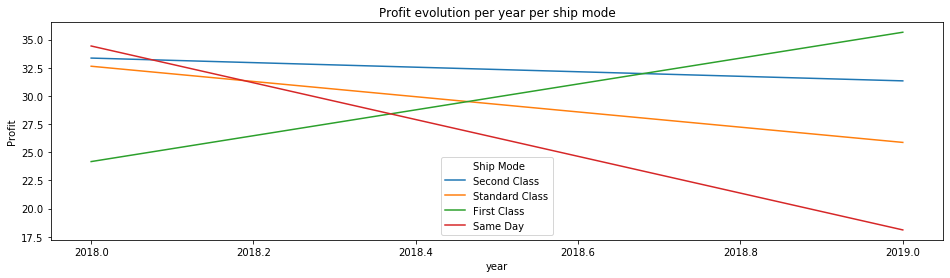

In [222]:
#Ploting a graph that shows Profit evolution per year (between 2018 and 2019) per ship mode
Profit_peryear_pershipmode = df.groupby(['orderyear','Ship Mode']).Profit.sum().reset_index()

plt.figure( figsize = (16,4 ))
chart=sb.lineplot(data=df2, x='orderyear', hue='Ship Mode', y='Profit', ci=None)
chart.set_title('Profit evolution per year per ship mode')
chart.set_xlabel('year')
chart.set_ylabel('Profit')
plt.show()

<b> This graph is showing the profit evolution per ship mode between 2018 and 2019. It is showing a sharp decrease between this two years except the first class mode which is increasing from 22.3 to 35 ( the first class is our effective and effecient mode last years)  

# Thank you. 


